In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [20]:
#load dataset
df= pd.read_csv('ev_evc_prototype.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          504 non-null    float64
 1   longitude         504 non-null    float64
 2   Charger type      504 non-null    object 
 3   Name              504 non-null    object 
 4   State             504 non-null    object 
 5   stations          504 non-null    int64  
 6   Plug types        504 non-null    object 
 7   Charging Network  384 non-null    object 
 8   Power (kW)        320 non-null    float64
 9   Hardware brand    154 non-null    object 
 10  Address           504 non-null    object 
 11  Postcode          504 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 47.4+ KB


In [22]:
#display columns
df.columns

Index(['latitude', 'longitude', 'Charger type', 'Name', 'State', 'stations',
       'Plug types ', 'Charging Network', 'Power (kW)', 'Hardware brand',
       'Address', 'Postcode'],
      dtype='object')

In [23]:
#calculate sum of null values
df.isnull().sum()

latitude              0
longitude             0
Charger type          0
Name                  0
State                 0
stations              0
Plug types            0
Charging Network    120
Power (kW)          184
Hardware brand      350
Address               0
Postcode              0
dtype: int64

In [24]:
#display all columns
pd.set_option('display.max_columns', None)

In [25]:
df.head()

,latitude,longitude,Charger type,Name,State,stations,Plug types,Charging Network,Power (kW),Hardware brand,Address,Postcode
0,-36.029472,146.897073,AC (level 2),Albury Waste Management Centre,NSW,1,Tesla (Type 2),Chargefox,NaN,NaN,"565 Mudge St, Hamilton Valley NSW 2641, Australia",2641
1,-30.511849,151.669382,AC (level 2),Armidale Visitors Centre,NSW,1,Tesla (Type 2),NRMA,50.0,NaN,"82 Marsh St, Armidale NSW 2350, Australia",2350
2,-33.906637,151.213249,AC (level 2),Audi Centre Sydney,NSW,1,Tesla (Type 2),Chargefox,NaN,NaN,"895 S Dowling St, Zetland NSW 2017, Australia",2017
3,-28.857543,153.561096,DC (level 3),Ballina Central Shopping Centre,NSW,2,Both CHAdeMO & CCS Combo 2/SAE,Chargefox,350.0,NaN,"56 Bangalow Rd, Ballina NSW 2478, Australia",2478
4,-34.841118,148.912191,AC (level 2),Banjo Paterson Park,NSW,1,Type 2,NRMA,50.0,NaN,"81 Meehan St, Yass NSW 2582, Australia",2582


In [26]:
#display null values
df[df.isnull().any(axis=1)]

,latitude,longitude,Charger type,Name,State,stations,Plug types,Charging Network,Power (kW),Hardware brand,Address,Postcode
0,-36.029472,146.897073,AC (level 2),Albury Waste Management Centre,NSW,1,Tesla (Type 2),Chargefox,NaN,NaN,"565 Mudge St, Hamilton Valley NSW 2641, Australia",2641
1,-30.511849,151.669382,AC (level 2),Armidale Visitors Centre,NSW,1,Tesla (Type 2),NRMA,50.0,NaN,"82 Marsh St, Armidale NSW 2350, Australia",2350
2,-33.906637,151.213249,AC (level 2),Audi Centre Sydney,NSW,1,Tesla (Type 2),Chargefox,NaN,NaN,"895 S Dowling St, Zetland NSW 2017, Australia",2017
3,-28.857543,153.561096,DC (level 3),Ballina Central Shopping Centre,NSW,2,Both CHAdeMO & CCS Combo 2/SAE,Chargefox,350.0,NaN,"56 Bangalow Rd, Ballina NSW 2478, Australia",2478
4,-34.841118,148.912191,AC (level 2),Banjo Paterson Park,NSW,1,Type 2,NRMA,50.0,NaN,"81 Meehan St, Yass NSW 2582, Australia",2582
...,...,...,...,...,...,...,...,...,...,...,...,...
499,-32.925817,151.779175,AC (level 2),Wharf Rd Carpark,NSW,4,Type 2,Chargefox,NaN,NaN,"209 Wharf Rd, Newcastle NSW 2300, Australia",2300
500,-32.950352,151.182086,AC (level 2),Wild Edge Retreat,NSW,2,J-1772,NaN,NaN,Tesla,"Wild Edge Retreat, 260 Craft Rd, Wollombi NSW ...",2325
501,-33.871086,151.214474,DC (level 3),Wilson Parking Domain Car Park,NSW,2,Both CHAdeMO & CCS Combo 2/SAE,NaN,NaN,NaN,"St Marys Rd, Sydney NSW 2000, Australia",2000
502,-33.859340,151.213523,AC (level 2),Wilson Secure Parking Opera House,NSW,2,Tesla (Type 2),NaN,NaN,NaN,"2A Macquarie St, Sydney NSW 2000, Australia",2000


In [27]:
#number of duplicate entries
print('Duplicate entries found in this dataset = {}.' .format(df.duplicated().sum()))

Duplicate entries found in this dataset = 2.


In [28]:
# Number of rows and columns in the dataframe
df.shape

(504, 12)

In [29]:
#describe data
df[['latitude', 'longitude', 'stations', 'Power (kW)']].describe()

,latitude,longitude,stations,Power (kW)
count,504.000000,504.000000,504.000000,320.000000
mean,-33.192794,150.813131,2.017857,36.324812
std,1.823806,1.698441,1.520463,62.030915
min,-36.941837,141.445393,1.000000,2.000000
25%,-33.919368,150.425230,1.000000,14.000000
50%,-33.770287,151.121731,2.000000,22.000000
75%,-32.777522,151.329321,2.000000,22.000000
max,-27.616332,153.615697,20.000000,450.000000


Text(0, 0.5, 'Power (kWh)')

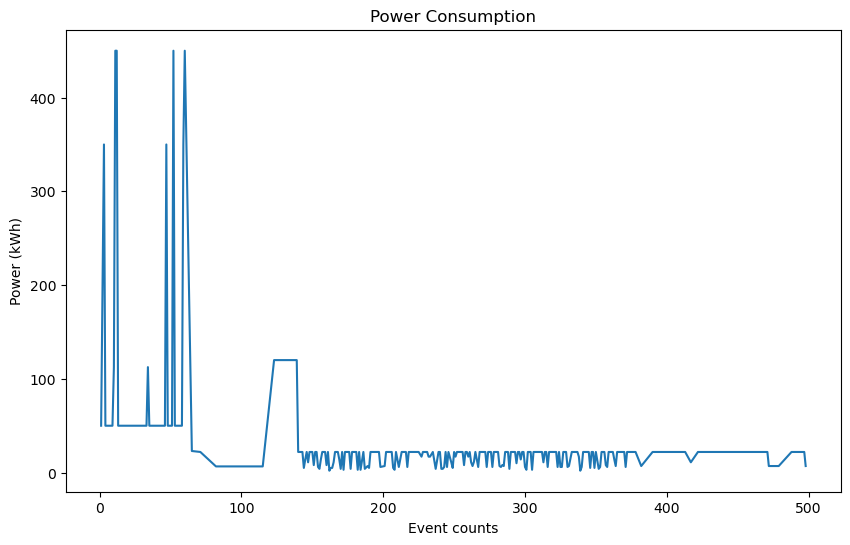

In [30]:
#visualize power consumption
plt.figure(figsize=(10,6))
sns.lineplot(df['Power (kW)'])
plt.title('Power Consumption')
plt.xlabel('Event counts')
plt.ylabel('Power (kWh)')

In [31]:
X = df[['stations']]
Y =  df[['latitude', 'longitude', 'Charger type', 'Name', 'State', 'stations',
       'Plug types ', 'Charging Network', 'Power (kW)', 'Hardware brand',
       'Address', 'Postcode']]

In [32]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

C:\Users\wambu\anaconda3\envs\PythonData\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


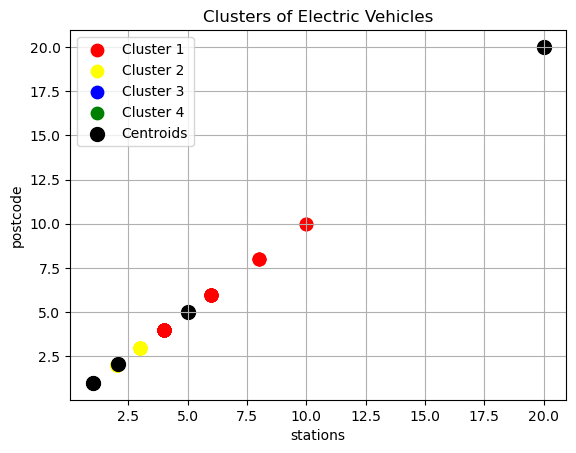

In [33]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0, 0], m[y_kmeans == 0, 0], s=80, c='red', label='Cluster 1')
plt.scatter(m[y_kmeans == 1, 0], m[y_kmeans == 1, 0], s=80, c='yellow', label='Cluster 2')
plt.scatter(m[y_kmeans == 2, 0], m[y_kmeans == 2, 0], s=80, c='blue', label='Cluster 3')
plt.scatter(m[y_kmeans == 3, 0], m[y_kmeans == 3, 0], s=80, c='green', label='Cluster 4')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 0], s=100, c='black', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('stations')
plt.ylabel('postcode')
plt.legend()
plt.grid(True)
plt.show()

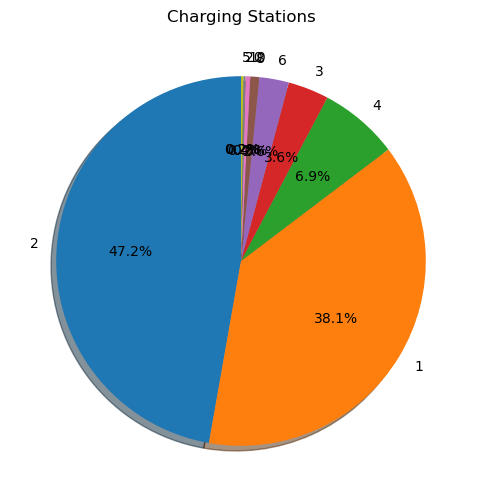

In [34]:
#pie chart 
plt.figure(figsize=(10,6))
df['stations'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Charging Stations')
plt.ylabel('')
plt.show()